In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df=pd.DataFrame(df)
df

In [ ]:
plt.pie(df.stroke.value_counts(),autopct='%1.0f%%',labels=['No Stroke','Stroke'])

In [ ]:
x=pd.DataFrame(df.drop(columns=['id']).describe().transpose())
x.drop(columns=['count','25%','50%','75%'])

In [ ]:
df.isna().sum()

In [ ]:
df.bmi.value_counts()

In [ ]:
sns.histplot(df.bmi)

In [ ]:
df.bmi.mean()

In [ ]:
df ["bmi"] = df["bmi"].replace(np.NaN, df["bmi"].mean())

In [ ]:
df.isna().sum()

In [ ]:
print(df.dtypes)

In [ ]:
df_numerical = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
numeric_columns = df[df_numerical]
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, cmap='Blues')
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = '{:.2f}'.format(corr_matrix.iloc[i, j])
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=10)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

In [ ]:
df.age.describe()

In [ ]:
sns.countplot(x=df.gender,hue=df.stroke)

In [ ]:
sns.countplot(x=df.work_type,hue=df.stroke)

In [ ]:
sns.countplot(x=df[df.stroke==1].gender)

In [ ]:
sns.countplot(x=df[df.stroke==1].ever_married)

In [ ]:
sns.heatmap(df.drop(columns=['id']).corr(),annot=True)

In [ ]:
sns.countplot(x=df[df.stroke==1].hypertension,hue=df.gender)

In [ ]:
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df[df.stroke==1])

In [ ]:
sns.catplot(y="hypertension", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

In [ ]:
sns.distplot(df[df['stroke'] == 0]["age"], color='green',label='No Stroke') 
sns.distplot(df[df['stroke'] == 1]["age"], color='red',label='Stroke') 
plt.legend(loc="upper left")
plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.show()

In [ ]:
sns.distplot(df[df['stroke'] == 0]["avg_glucose_level"], color='green',label='No Stroke') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["avg_glucose_level"], color='red',label='Stroke') # Stroke - Red
plt.legend(loc="upper left")
plt.title('No Stroke vs Stroke by Avg. Glucose Level')
plt.show()

In [ ]:
df1=df.loc[(df['hypertension']==1) & (df['heart_disease']==1)]
plt.pie(df1.stroke.value_counts(),autopct='%1.0f%%',labels=['No Stroke','Stroke'])
plt.title("Patients with Hypertension & Heart Disease",y=-0.01)

In [ ]:
df1=df.loc[(df['hypertension']==0) & (df['heart_disease']==0)]
plt.pie(df1.stroke.value_counts(),autopct='%1.0f%%',labels=['No Stroke','Stroke'])
plt.title("Patients without Hypertension & Heart Disease",y=-0.01)

In [ ]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df[['gender', 'ever_married','work_type','Residence_type','smoking_status']] = df[['gender', 'ever_married','work_type','Residence_type','smoking_status']].apply(label_encoder.fit_transform)
df.head()


In [ ]:
X=df.drop(columns=['stroke'])
y=df.stroke

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
#Decision tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize a DecisionTreeClassifier with class_weight='balanced'
clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Initialize a GridSearchCV object with 'f1' scoring
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# The best model is stored in grid_search.best_estimator_
model_v4a = grid_search.best_estimator_

# Generate predictions on the test set
y_pred_v4a = model_v4a.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_v4a))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1198
           1       0.15      0.41      0.22        80

    accuracy                           0.82      1278
   macro avg       0.55      0.63      0.56      1278
weighted avg       0.91      0.82      0.86      1278



In [50]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

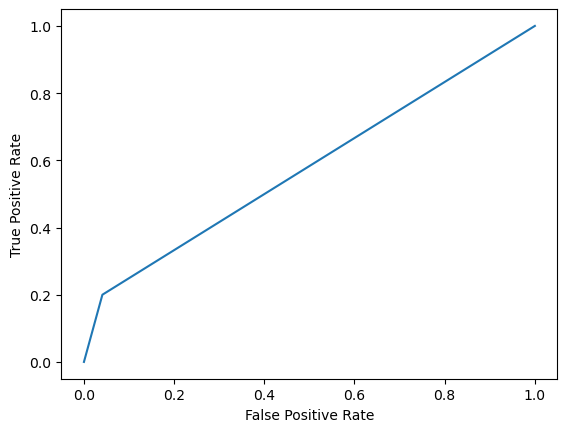

In [51]:
from sklearn import metrics
#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.5068238731218697

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.08841940532081377

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.08841940532081377

In [55]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) # Accuracy

array([[1149,   49],
       [  64,   16]])

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) 

0.9115805946791862

In [57]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred) 

0.2

In [58]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.24615384615384617

<Axes: >

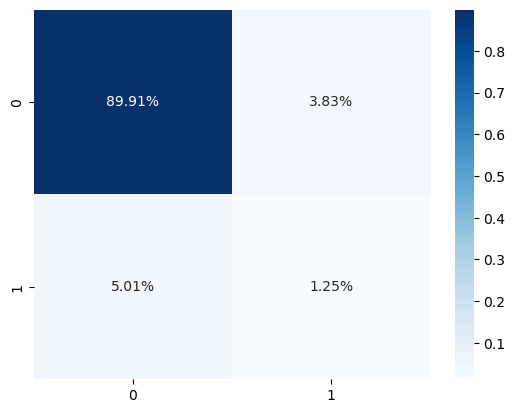

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred) 

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [60]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_test, y_pred)

0.5795492487479131

In [61]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.22068965517241382

In [62]:
x=[[97.46,'Training Accuracy',95.04],[93.73,'Testing Accuracy',95.37],[0.24,'Precision',0.13],['0.2','Recall','0.92'],[0.22,'f1 Score',0.04],[0.57,'AUC',0.50]]
d=pd.DataFrame(x,columns=['DT','Score','SVM'])

d

,DT,Score,SVM
0,97.46,Training Accuracy,95.04
1,93.73,Testing Accuracy,95.37
2,0.24,Precision,0.13
3,0.2,Recall,0.92
4,0.22,f1 Score,0.04
5,0.57,AUC,0.5


In [63]:
left_aligned_df = d.style.set_properties(**{'text-align': 'center'})
display(left_aligned_df)

,DT,Score,SVM
0,97.460000,Training Accuracy,95.040000
1,93.730000,Testing Accuracy,95.370000
2,0.240000,Precision,0.130000
3,0.2,Recall,0.92
4,0.220000,f1 Score,0.040000
5,0.570000,AUC,0.500000


In [64]:
#SVM

In [71]:
from sklearn.svm import SVC 
clf = SVC(kernel='linear') 
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

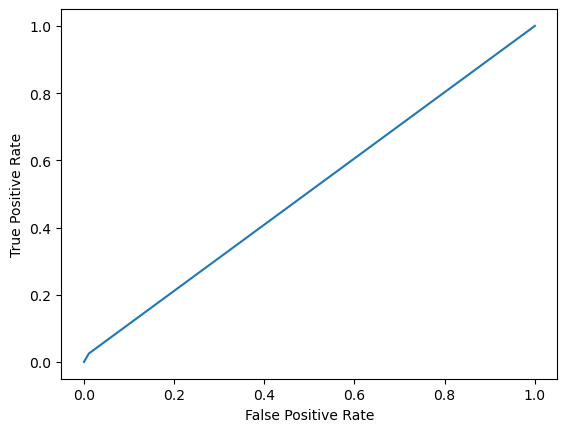

In [66]:
from sklearn import metrics
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<Axes: >

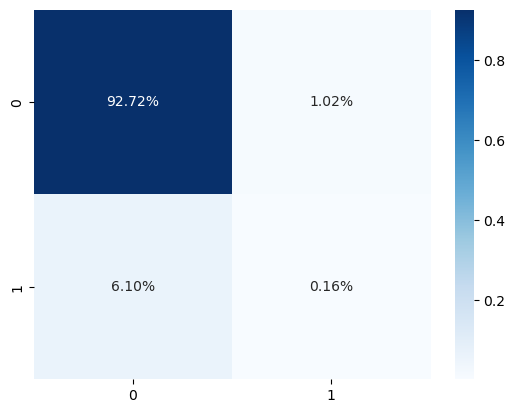

In [67]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:

# Define the parameter grid
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

# Initialize a SVC
clf = SVC()

# Initialize a GridSearchCV object with 'f1' scoring
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# The best model is stored in grid_search.best_estimator_
model_v4a = grid_search.best_estimator_

# Generate predictions on the test set
y_pred_v4a = model_v4a.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_v4a))

In [153]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_test, y_pred)

0.5070742904841402

In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # Recall

0.9287949921752738

In [155]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred) # Precision

0.025

In [156]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.13333333333333333

In [157]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.04210526315789474

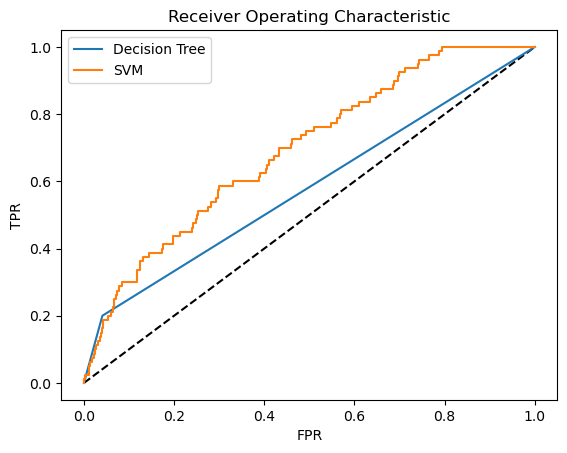

In [159]:
#ROC Curve
from sklearn.metrics import roc_curve

clf1 = DecisionTreeClassifier(random_state=0)
clf1.fit(X_train,y_train)
y_pred_prob1 = clf1.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

clf2 = SVC(kernel='linear',probability=True) 
clf2.fit(X_train,y_train)
y_pred_prob2 = clf2.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)





plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "SVM")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()